The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [1]:
!pip install datascience -q
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Review
## Chapters 3 - 4

In [2]:
# Import the skyscrappers.csv as skyscrapers
skyscrapers = Table().read_table('skyscrapers.csv')

In [5]:
# Select skyscrappers in Denver.
skyscrapers.where('city', are.equal_to('Denver'))

name,material,city,height,completed
Republic Plaza,steel,Denver,217.63,1984
1801 California Plaza,steel,Denver,216.11,1982
Wells Fargo Center,composite,Denver,212.75,1983
Four Seasons Hotel & Private Residences,concrete,Denver,194.75,2010


In [6]:
# Select the skyscrappers that are larger or equal to 400 meters.
skyscrapers.where('height', are.above_or_equal_to(400))

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009


In [7]:
# Type 'Loyola Hall' as a string and assign it to location
location = 'Loyola Hall'

In [8]:
# Use string.replace() to replace Loyola with Clarke in location.
location.replace('Loyola', 'Clarke')

'Clarke Hall'

# Chapter 5: Sequences

## Arrays
- An array contains a sequence of values
- Arrays can be strings, or numbers, and a mix, but the should usally be of the same type of data
- Arithmetic is applied to each element individually
- Array lengths much match for arithmetic bewteen arrays
- A column of a Table is an array
- fucntion make_array(values)

### Let's run some code

In [9]:
my_array = make_array(1, 2, 3, 4)

In [10]:
my_array

array([1, 2, 3, 4], dtype=int64)

In [11]:
my_array * 2

array([2, 4, 6, 8], dtype=int64)

In [12]:
my_array ** 2

array([ 1,  4,  9, 16], dtype=int64)

In [13]:
my_array + 1

array([2, 3, 4, 5], dtype=int64)

In [14]:
my_array # array is unchanged

array([1, 2, 3, 4], dtype=int64)

In [25]:
[1,2,3]+2

TypeError: can only concatenate list (not "int") to list

In [24]:
np.array([1,2,3])+2

array([3, 4, 5])

In [21]:
make_array(1,2,3)

array([1, 2, 3], dtype=int64)

In [27]:
my_array

array([1, 2, 3, 4], dtype=int64)

In [26]:
len(my_array)

4

In [28]:
sum(my_array)

10

In [29]:
len(my_array) / sum(my_array)

0.4

In [30]:
len(my_array) / sum(my_array).mean()

0.4

In [31]:
another = make_array(60, 70, 80, 90)

In [32]:
my_array + another

array([61, 72, 83, 94], dtype=int64)

In [33]:
yet_another = make_array(5, 6, 7)

In [34]:
my_array + yet_another

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [35]:
tunas = make_array('bluefin', 'albacore', 'jim')
tunas

array(['bluefin', 'albacore', 'jim'], dtype='<U8')

In [36]:
make_array('red fish', 'blue fish', 1, 2)

array(['red fish', 'blue fish', '1', '2'], dtype='<U11')

## Columns of Tables are Arrays ##

In [37]:
skyscrapers = Table.read_table('skyscrapers.csv')
sf = skyscrapers.where('city', 'San Francisco')
sf

name,material,city,height,completed
Transamerica Pyramid,composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009


In [38]:
sf.select('height')

height
260
237.44
211.84
196.6


In [39]:
sf.column('height')

array([260.        , 237.44000244, 211.83999634, 196.6000061 ])

In [40]:
sf.column('height').mean()

226.470001220705

In [41]:
den = skyscrapers.where('city', 'Denver')

In [42]:
sf.column('height').mean() - den.column('height').mean()

16.15999984741501

## Numpy
- Numpy package usually abreviated as ***np***
- Nummpy is a powerful package used to manipulate arrays
- [Numpy Documentation](https://numpy.org/doc/stable/reference/)
- [Text book numpy function cheatsheet](https://www.inferentialthinking.com/chapters/05/1/Arrays.html#Functions-on-Arrays)

## Ranges
- A range is an array of consecutive numbers
- np.arange(end) == an array of increasing integers from 0 to end
- np.arange(start, end) == an array of increasing integers from start to end
- np.arange(start, end, step) == an array of increasing integers from start to end with step between consecutive numbers
- np.arange always includes start and exludes end



In [43]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [44]:
np.arange(50, 100)

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [45]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

In [46]:
np.arange(1.5, -2, -0.5)

array([ 1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5])

Let's calculate the [Harmonic Series](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics)) to 10^9

In [50]:
value = int(10**9)
ones = np.ones(value, dtype='int64')
len(ones)
denom = np.arange(1, (value+1))
(ones/denom).sum()

21.300481502347903

# Chapter 6: Tables
- There are too many Table functions to list here.  
- [Table documentation](http://data8.org/datascience/tables.html)
- Here are some functions to get us started
    - Table.read_table(file_name) to load .csv file as a Table
    - Table.with_columns('Label_1', Values_1, 'Label_2', Values_2, etc.)) to create Table
    - Table.columns('Label') to get array of values from Label index
    - .sum('Label'), .min('Label'), .max('Label') of values from Label index
    - .drop('Label') to drop Label from Table

## Let's create a table from scratch ##

In [51]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')
streets

array(['Bancroft', 'Durant', 'Channing', 'Haste'], dtype='<U8')

In [53]:
southside = Table().with_column('Streets', streets)
southside

Streets
Bancroft
Durant
Channing
Haste


In [54]:
southside.with_column('Blocks from campus', np.arange(4))

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [55]:
southside

Streets
Bancroft
Durant
Channing
Haste


In [56]:
southside = southside.with_column('Blocks from campus', np.arange(4))
southside

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [57]:
southside.labels

('Streets', 'Blocks from campus')

In [58]:
southside.num_columns

2

In [59]:
southside.num_rows

4

## W.E.B. du Bois demo
 - W.E.B. du Bois 1868 - 1963
 - Scholar, historian, activist, data scientist
 
 ### Income and Expediture of 150 Black Famalies in Alanta GA
 <img src=du_bois_chart.jpg style="width: 500px;"/>

In [60]:
du_bois = Table.read_table('du_bois.csv')
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


In [61]:
du_bois.select('STATUS')

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


In [62]:
du_bois.column('STATUS')

array(['POOR', 'POOR', 'FAIR', 'FAIR', 'COMFORTABLE', 'COMFORTABLE',
       'WELL-TO-DO'], dtype='<U11')

In [63]:
du_bois.column('ACTUAL AVERAGE')

array([ 139.1 ,  249.45,  335.66,  433.82,  547.  ,  880.  , 1125.  ])

In [64]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

In [65]:
du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')

array([ 59.813 , 117.2415, 144.3338, 160.5134, 169.57  , 325.6   ,
       326.25  ])

In [66]:
food_dollars = du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')
du_bois = du_bois.with_column(
    'Food $',
    food_dollars
)
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO,326.25


In [67]:
du_bois.set_format('FOOD', PercentFormatter)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


In [68]:
du_bois.select('CLASS', 'ACTUAL AVERAGE', 'FOOD', 'Food $')

CLASS,ACTUAL AVERAGE,FOOD,Food $
100-200,139.1,43.00%,59.813
200-300,249.45,47.00%,117.241
300-400,335.66,43.00%,144.334
400-500,433.82,37.00%,160.513
500-750,547,31.00%,169.57
750-1000,880,37.00%,325.6
1000 and over,1125,29.00%,326.25


In [69]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

In [70]:
# Which group ("CLASS") spent the highest percentage on rent?
du_bois.with_column('Percentage on Rent', du_bois.column('RENT')*100).sort('Percentage on Rent', descending=True)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $,Percentage on Rent
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334,23
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241,22
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813,19
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513,18
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57,13
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6,0
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25,0


## Selecting data in a column ##

In [71]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,8.17,10436.8,708,American Sniper
2013,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,7.96,10959.6,669,The Avengers
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2
2010,7.89,10212.7,538,Toy Story 3


In [72]:
gross_in_dollars = movies.column('Total Gross') * 1e6
tix_sold = gross_in_dollars / movies.column('Average Ticket Price')

In [73]:
movies = movies.with_column('Tickets sold', tix_sold)

In [78]:
movies.sort('Tickets sold', descending = True)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,1.58731e+09
2003,6.03,9057.5,506,The Lord of the Rings: The Return of the King,1.50207e+09
2004,6.21,9321.7,551,Shrek 2,1.50108e+09
1997,4.59,6671.8,303,Titanic,1.45355e+09
1999,5.06,7316.7,385,Star Wars: Episode I - The Phantom Menace,1.44599e+09
2009,7.5,10821.6,520,Avatar,1.44288e+09
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,1.42832e+09
2000,5.39,7678.3,371,How the Grinch Stole Christmas,1.42455e+09
2007,6.88,9690.7,632,Spider-Man 3,1.40853e+09
2006,6.55,9214.6,608,Pirates of the Caribbean: Dead Man's Chest,1.40681e+09


In [79]:
movies.set_format('Tickets sold', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,"1,226,844,978.17"
2018,9.11,11611.3,878,Black Panther,"1,274,566,410.54"
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2014,8.17,10436.8,708,American Sniper,"1,277,454,100.37"
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,"1,347,589,175.89"
2012,7.96,10959.6,669,The Avengers,"1,376,834,170.85"
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2010,7.89,10212.7,538,Toy Story 3,"1,294,385,297.85"


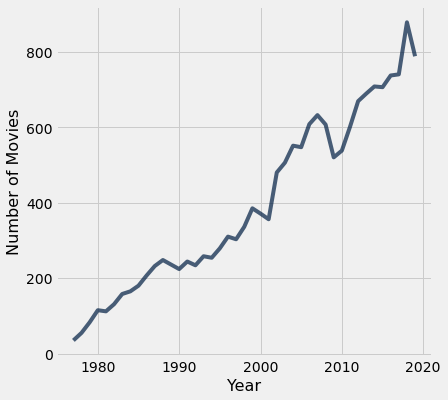

In [91]:
movies.plot('Year', 'Number of Movies')

In [81]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2004,6.21,9321.7,551,Shrek 2,"1,501,078,904.99"
2003,6.03,9057.5,506,The Lord of the Rings: The Return of the King,"1,502,072,968.49"
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"
2000,5.39,7678.3,371,How the Grinch Stole Christmas,"1,424,545,454.55"


In [82]:
movies.where('Year', 2002)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [83]:
movies.where('Year', are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [84]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"


In [88]:
movies.take([2,3,4])

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
